1. Inspect  the FP collision of each type of FP in val set and test. Then we can see in a way which kind of FP is good.
2. Plot the probibilty of activation of each index position for reduced_r0-r4 

In [27]:
import torch, pickle
import numpy as np
from collections import Counter
import os, tqdm
from collections import defaultdict


def get_FP_bytes_and_smiles(x):
    smile_idx, FP = x
    return np.array(FP).tobytes(), smile_idx

# binary dataset
def inspect_molecule_collision(FP_type, split = 'val', verbose=False):
    path = f'/workspace/ranking_sets_cleaned_by_inchi/SMILES_{FP_type}_ranking_sets/{split}/rankingset.pt'
    all_files = list(sorted(os.listdir(f'/workspace/SMILES_dataset/{split}/{FP_type}/')))
    ranking_set = torch.load(path)
    smiles_look_up  = pickle.load(open(f'/workspace/SMILES_dataset/{split}/SMILES/index.pkl', 'rb'))
    # count how many times each molecule appears in the ranking set
    ranking_set_FP_smiles_pairs = map(get_FP_bytes_and_smiles, enumerate(ranking_set))
    dict_from_FP_to_smiles = defaultdict(list)        
    for FP, smiles_idx in ranking_set_FP_smiles_pairs:         
                
        idx_in_smiles_pickle = int((all_files[smiles_idx]).split(".")[0])
        dict_from_FP_to_smiles[FP].append(smiles_look_up[idx_in_smiles_pickle])
    
    collision_molecules = 0
    for k, v in dict_from_FP_to_smiles.items():
        if len(v) > 1:
            collision_molecules += len(v)
            
    print(f'{FP_type:>20}, {split:>4} set has {collision_molecules} molecule collisions')
    
    
    if verbose:
        for k,value in dict_from_FP_to_smiles.items():
            if len(value)>1:
                print(f" {len(value)} molecules have same FPs:")
                for v in value: print(v)    

    return dict_from_FP_to_smiles



In [28]:
from pathlib import Path
folder_base = Path("/workspace/SMILES_dataset")
choice_split = ["val", "test"]
output_path = Path("/workspace/ranking_sets_cleaned_by_inchi")
os.makedirs(output_path, exist_ok=True)
# fp_paths = [ f"R{i}-6144FP" for i in range(3,11)]
# fp_paths+=[]
fp_paths = os.listdir(folder_base / "test")
fp_paths = list(filter(lambda x: "FP"  in x , fp_paths))
fp_paths

['R2-6144FP',
 'HYUN_FP',
 'R0_to_R4_30720_FP',
 'R0_to_R4_reduced_FP',
 'R3-6144FP',
 'R4-6144FP',
 'R5-6144FP',
 'R6-6144FP',
 'R7-6144FP',
 'R8-6144FP',
 'R9-6144FP',
 'R10-6144FP',
 'R2-6144-count-based-FP']

In [29]:
for fp in fp_paths:
    for split in ['val', 'test']:
        inspect_molecule_collision(fp, split, verbose=False)

           R2-6144FP,  val set has 199 molecule collisions
           R2-6144FP, test set has 189 molecule collisions
             HYUN_FP,  val set has 202 molecule collisions
             HYUN_FP, test set has 189 molecule collisions
   R0_to_R4_30720_FP,  val set has 103 molecule collisions
   R0_to_R4_30720_FP, test set has 78 molecule collisions
 R0_to_R4_reduced_FP,  val set has 105 molecule collisions
 R0_to_R4_reduced_FP, test set has 78 molecule collisions
           R3-6144FP,  val set has 142 molecule collisions
           R3-6144FP, test set has 116 molecule collisions
           R4-6144FP,  val set has 103 molecule collisions
           R4-6144FP, test set has 78 molecule collisions
           R5-6144FP,  val set has 85 molecule collisions
           R5-6144FP, test set has 57 molecule collisions
           R6-6144FP,  val set has 65 molecule collisions
           R6-6144FP, test set has 47 molecule collisions
           R7-6144FP,  val set has 49 molecule collisions
     

In [30]:
r0_r4_val_collisions = inspect_molecule_collision('R0_to_R4_reduced_FP', 'test', verbose=True)

 R0_to_R4_reduced_FP, test set has 78 molecule collisions
 2 molecules have same FPs:
Cc1c(O)c(C)c2c(c1O)C(=O)OC(C)(O)C2C
O=C1CCc2ccc(O)c(c2)-c2cc(ccc2O)CCC(O)C1
 2 molecules have same FPs:
Cc1cc(O)c(C)c2c1CCC1C(C)C(=O)OC21
Cc1cc(O)c(C=O)c(O)c1C(=O)OCc1cc(O)c(C)c(O)c1C(=O)O
 2 molecules have same FPs:
C=C(C(=O)O)C1CCC(C)(O)C2CCC(C)(O2)C(OC(C)=O)CCC(C)(OC)C(O)C1
C=C1CCC(O)C2(C)CC=C3C(C(C)C)=CCC3(C)CC12O
 2 molecules have same FPs:
OCC1OC(OC2OC=CC3(O)C(O)C4OC4C23)C(O)C(O)C1O
OCC1OC(OC2OC=CC3C(O)CC(O)(CCl)C23)C(O)C(O)C1O
 3 molecules have same FPs:
CC(=O)OC1C(C)OC(OC(=O)C23CCC(C)(C)CC2C2=CCC4C5(C)CCC(OC6OC(C(=O)O)C(O)C(OC7OC(C)C(O)C(O)C7O)C6OC6OC(CO)C(O)C(O)C6O)C(C)(C=O)C5CCC4(C)C2(C)CC3O)C(OC2OC(C)C(O)C(OC3OC(CO)C(O)C(O)C3O)C2O)C1OC1OC(CO)C(O)C(O)C1O
C=C(C)C(O)Cc1c(O)c(CC=C(C)C)c2occ(-c3ccc(O)c(O)c3)c(=O)c2c1O
CC(=O)OC1C(C)OC(Oc2c(-c3cc(O)c(O)c(O)c3)oc3cc(O)cc(O)c3c2=O)C(O)C1OC(C)=O
 2 molecules have same FPs:
CC1=CCC2CC(CC3(CCC(C)C(C)O3)O2)OC(=O)C2C=C(C)C(O)C3OCC(=CC=CC(C)C1)C23O
CC1=CC

In [26]:

# count-based dataset
for FP_type in ['SMILES_R2-6144-count-based-FP_ranking_sets']:
    for split in ['val', 'test']:
        path = f'/workspace/ranking_sets_cleaned_by_inchi/{FP_type}/{split}/rankingset.pt'
        ranking_set = torch.load(path)
        # count how many times each molecule appears in the ranking set
        ranking_set_mapped = map(lambda x: (np.array(x)).tobytes(), ranking_set)
        counter = Counter(ranking_set_mapped)
        
        collision_moleculs = 0
        for k, v in counter.items():
            if v > 1:
                collision_moleculs += v
    

        print(f'{"_".join(FP_type.split("_")[:]):>20}, {split:>4} set has {collision_moleculs} molecule collisions ')
    


SMILES_R2-6144-count-based-FP_ranking_sets,  val set has 4590 molecule collisions 
SMILES_R2-6144-count-based-FP_ranking_sets, test set has 4567 molecule collisions 


In [50]:
for k,v in counter.most_common(1):
    k = torch.frombuffer(k, dtype=torch.float32)
    print(k.nonzero().flatten(), k[k.nonzero()].flatten(), v)

tensor([  24,   91,  135,  202,  213,  267,  363,  432,  754,  762,  794,  925,
         932, 1055, 1083, 1152, 1380, 1450, 1478, 1699, 1839, 1923, 2078, 2117,
        2281, 2305, 2316, 2488, 2582, 2680, 2684, 2698, 2742, 2795, 3019, 3022,
        3105, 3483, 3515, 3845, 3965, 4073, 4097, 4176, 4263, 4381, 4410, 4662,
        4791, 4903, 4942, 4951, 4960, 5117, 5131, 5156, 5178, 5244, 5249, 5482,
        5635, 5748, 5853, 5863, 5876, 5969, 5973, 6066]) tensor([ 1., 12.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,
         1.,  1.,  2.,  1.,  5.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  2.,  1.,  4.,  5.,  1.,  1.,  1.,  4.,  1.,  2.,  1.,  3.,  1.,
         1.,  7.,  1.,  2.,  1.,  1.,  4.,  3.,  1.,  1.,  1.,  1.,  2.,  1.,
         1., 14.,  1.,  1.,  1., 34.,  1.,  1.,  1.,  2.,  1.,  1.]) 9


In [53]:
import torch.nn.functional as F
normed_k = F.normalize(k, p=2, dim=0)
normed_k @ normed_k.T

tensor(1.0000)

In [39]:
ranking_set.dtype

torch.float32

In [2]:
val_ranking_set = torch.load('/workspace/ranking_sets_cleaned_by_inchi/SMILES_R2-6144FP_ranking_sets/val/rankingset.pt')
test_ranking_set = torch.load('/workspace/ranking_sets_cleaned_by_inchi/SMILES_R2-6144FP_ranking_sets/test/rankingset.pt')
val_ranking_set.shape, test_ranking_set.shape

(torch.Size([13738, 6144]), torch.Size([13630, 6144]))

In [5]:
int(9.0) == 9.0

True

In [3]:
import numpy as np
from rdkit.Chem import rdMolDescriptors
import torch
import matplotlib.pyplot as plt 

test_ranking_set = torch.load('/workspace/ranking_sets_cleaned_by_inchi/SMILES_R0_to_R4_reduced_FP_ranking_sets/test/rankingset.pt')

In [4]:
test_set_probability = np.array(test_ranking_set.sum(dim=0) / test_ranking_set.shape[0])
sorted_indices = np.argsort(test_set_probability)[::-1]

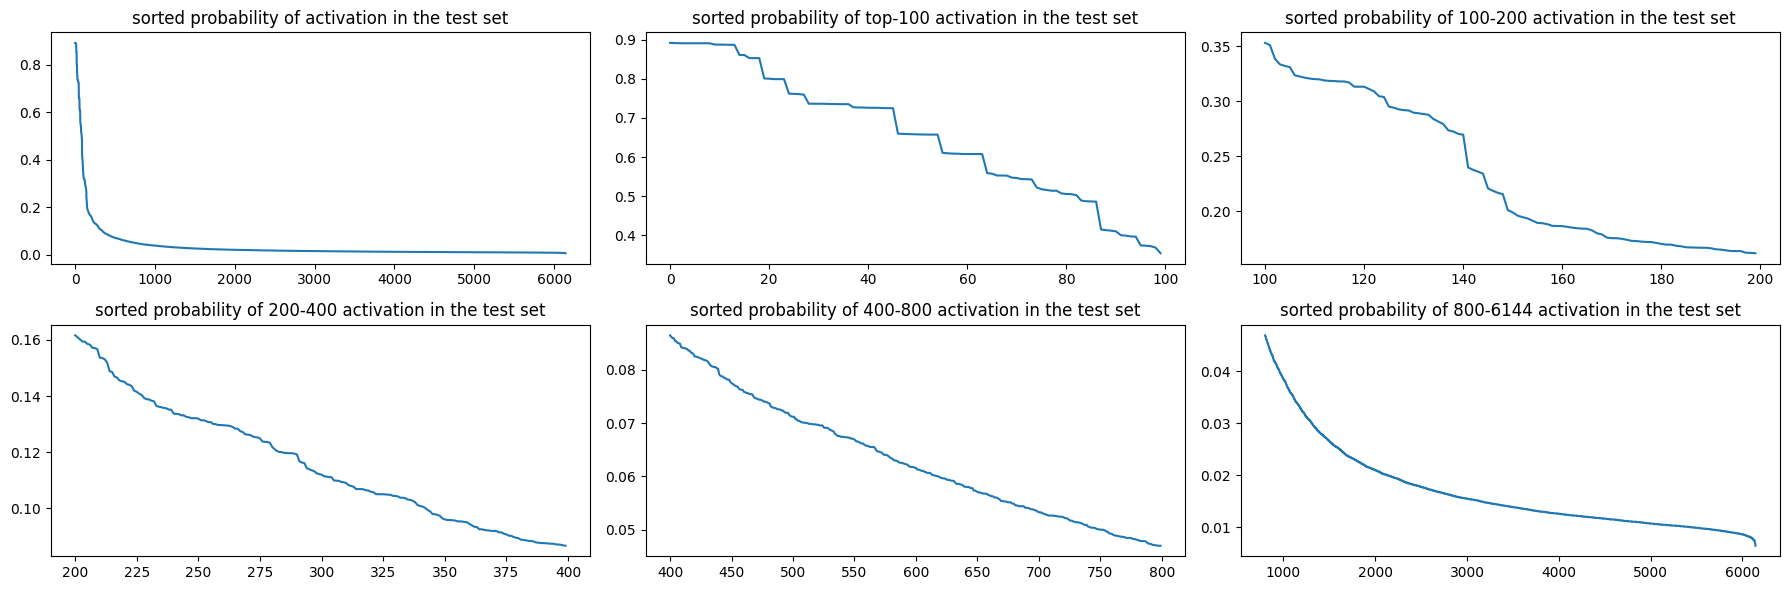

In [5]:
def plot_activations(FP_probability):
    fig, ax = plt.subplots(2, 3, figsize=(18, 6))

    ax[0,0].plot(FP_probability[sorted_indices])
    ax[0,0].set_title("sorted probability of activation in the test set")

    ax[0,1].plot(FP_probability[sorted_indices][:100])
    ax[0,1].set_title("sorted probability of top-100 activation in the test set")

    ax[0,2].plot(np.arange(100,200),FP_probability[sorted_indices][100:200])
    ax[0,2].set_title("sorted probability of 100-200 activation in the test set")


    ax[1,0].plot(np.arange(200,400),FP_probability[sorted_indices][200:400])
    ax[1,0].set_title("sorted probability of 200-400 activation in the test set")

    ax[1,1].plot(np.arange(400,800),FP_probability[sorted_indices][400:800])
    ax[1,1].set_title("sorted probability of 400-800 activation in the test set")

    ax[1,2].plot(np.arange(800,6144),FP_probability[sorted_indices][800:])
    ax[1,2].set_title("sorted probability of 800-6144 activation in the test set")

    plt.tight_layout()
    plt.show()

plot_activations(test_set_probability)


In [6]:
import torch, sys
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import ModelCheckpoint
folder_parent_directory = "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/smart4.5"
if folder_parent_directory not in sys.path:
    sys.path.insert(0, folder_parent_directory)
from models.ranked_transformer import HsqcRankedTransformer
from datasets.hsqc_folder_dataset import FolderDataModule
import yaml
from pytorch_lightning.loggers import TensorBoardLogger
torch.set_float32_matmul_precision('high')


In [7]:

checkpoint_path = \
    "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/mask_by_indices/input_output_versions/r0_r4_reduced/checkpoints/epoch=24-step=42850.ckpt"
    # "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/high_precision/tuning_reduced_with_mass/increase_pos_weight/checkpoints/epoch=26-step=46278.ckpt"


def find_model_activation_probability(checkpoint_path):
    # Load the checkpoint from the path
    
    hyperpaerameters_path = checkpoint_path.split("checkpoints")[0] + "hparams.yaml"
    # # Load the YAML file
    with open(hyperpaerameters_path, 'r') as file:
        hparams = yaml.safe_load(file)

    # hparams["FP_choice"]='R2-6144FP'
    # hparams["warm_up_steps"] = 10000

    model = HsqcRankedTransformer.load_from_checkpoint(checkpoint_path)
    model.change_ranker_for_testing()

    data_module = FolderDataModule(dir="/workspace/SMILES_dataset", 
                                input_src=["HSQC", "oneD_NMR"], 
                                FP_choice=hparams["FP_choice"],
                                batch_size=64, parser_args=hparams)
    data_module.setup("test")
    count = np.zeros(6144)
    for batch in data_module.test_dataloader():
        
        x, labels = batch
        # labels = labels.type(torch.float32)
        out = model.forward(x.to(model.device))
        count += np.array((out>0).sum(0).cpu())
    probability = count / test_ranking_set.shape[0]
    return probability

In [8]:
model_out_probabilty = find_model_activation_probability(checkpoint_path)

Initialized SignCoordinateEncoder[384] with dims [180, 180, 24] and 2 positional encoders. 24 bits are reserved for encoding the final bit


HsqcRankedTransformer saving args
/workspace/SMILES_dataset/test


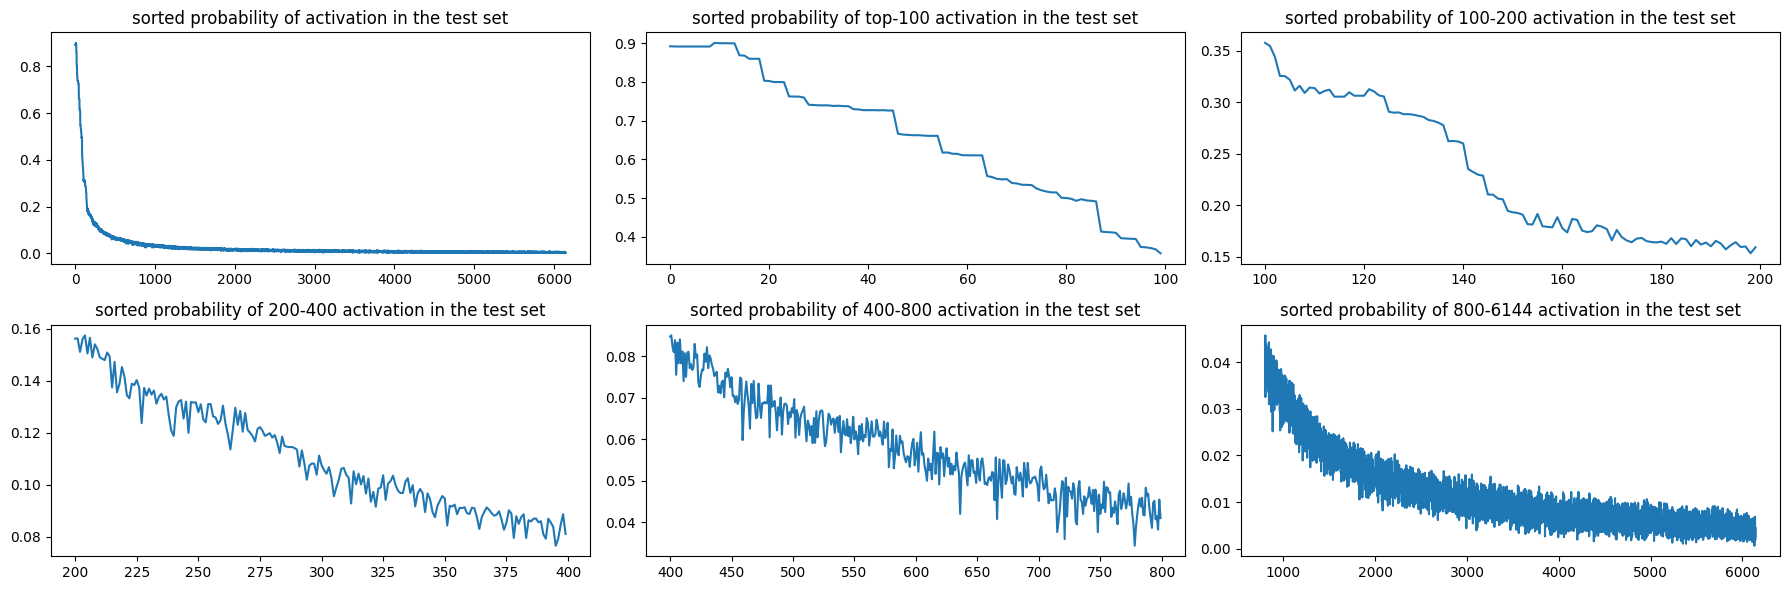

In [9]:
plot_activations(model_out_probabilty)


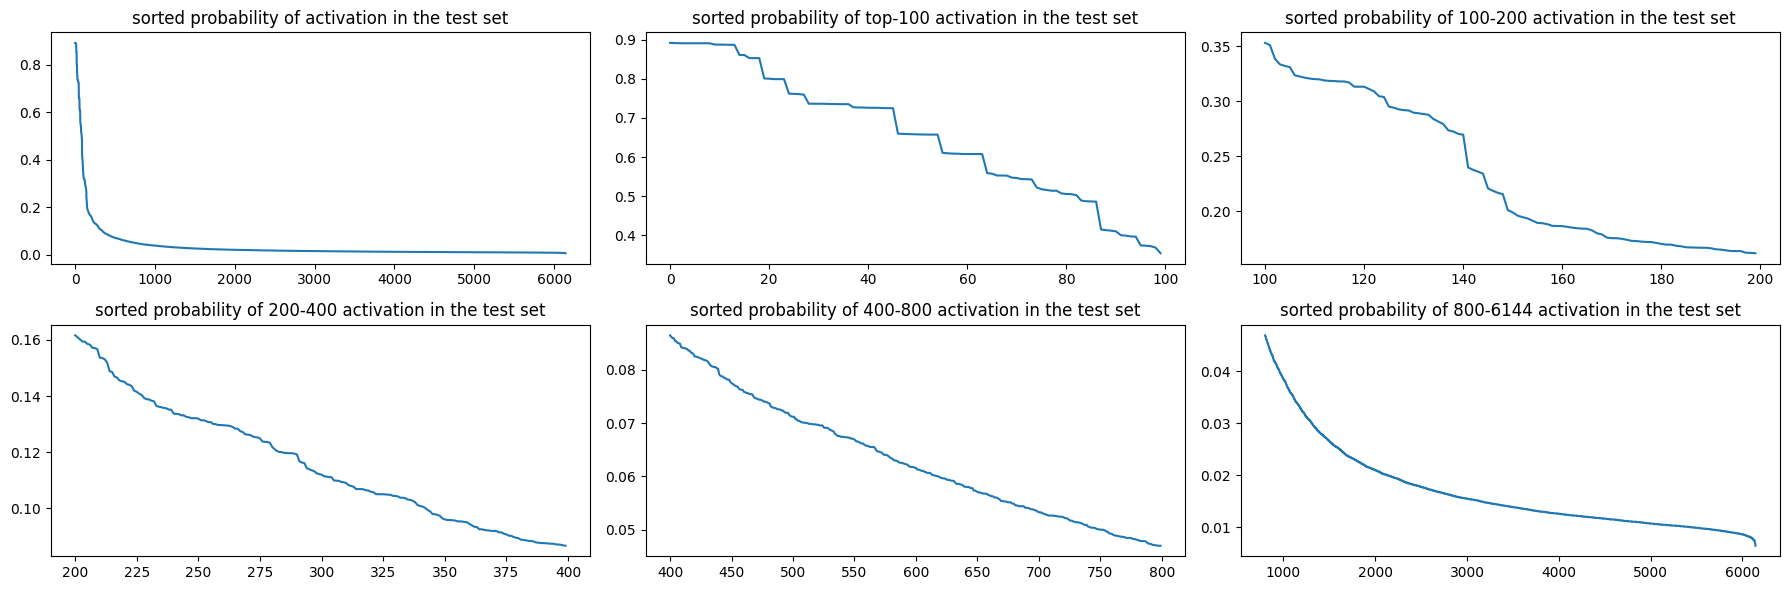

In [10]:
plot_activations(test_set_probability)
